# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [12]:
df = pd.read_excel('/content/Personality.xlsx')


Display the summary of all the features of the dataset using `.info()`

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Name                          99 non-null     object
 1   Posts/Shares Frequently?      99 non-null     int64 
 2   Active?                       99 non-null     int64 
 3   Replies to comments/Messages  99 non-null     int64 
 4   Numbers of Friends/Followers  99 non-null     int64 
 5   Personality                   99 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


Display the total number of samples from each label using `.value_counts()`

In [14]:
df.value_counts()

,,,,,,count
Name,Posts/Shares Frequently?,Active?,Replies to comments/Messages,Numbers of Friends/Followers,Personality,
Aaron,0,1,1,952,1,1
Ace,1,1,1,957,0,1
Adryl,0,0,1,506,1,1
Alexandra,1,1,1,106,0,1
Alyssa,1,1,1,5000,0,1
...,...,...,...,...,...,...
Yanna,0,1,1,782,0,1
Yen,0,0,0,831,1,1
Yeshua,0,0,1,1100,0,1


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

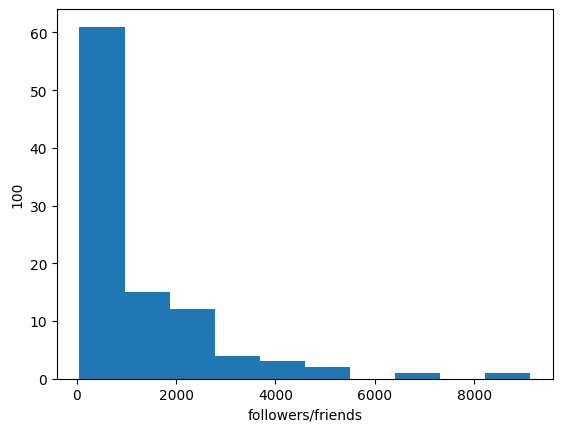

In [16]:
plt.hist(df["Numbers of Friends/Followers"])
plt.xlabel("followers/friends")
plt.ylabel("100")
plt.show()

Remove the name column using `drop()` method

In [33]:
# Array of features
X = df.drop(columns=['Personality', 'Name']).values

# Array of Labels
y = df['Personality'].values

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [52]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()


Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


Display the dimensions of each variables using `.shape()`

In [53]:
df.shape

(99, 6)

## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [60]:
knn = KNeighborsClassifier(n_neighbors=13)


Train the model using the `.fit()`

In [66]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

Test the model using the `.predict()`

In [67]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

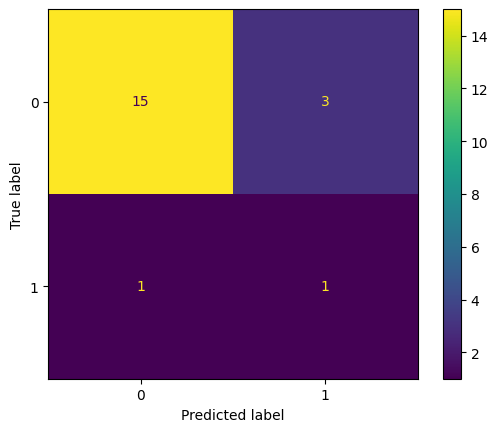

In [68]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [69]:
metrics.accuracy_score(y_test, y_pred)


0.8

Display the precision

In [70]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.83333333 0.5       ]


Display the recall

In [71]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.9375 0.25  ]


Display the f1-score

In [72]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.88235294 0.33333333]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

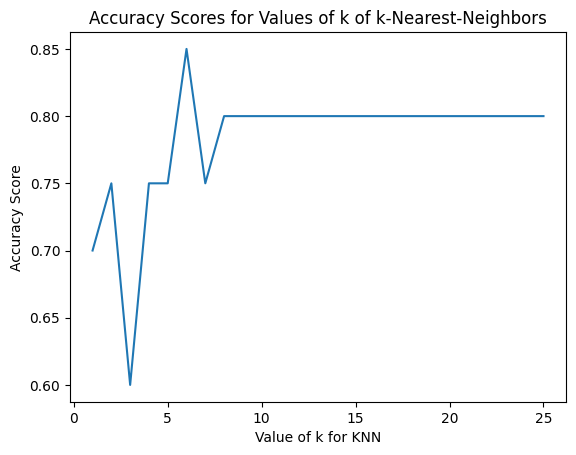

In [73]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [74]:
# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

array([0])